# Requirements

1) Install libraries to run code

2) The game can be run just by running the last cell along with it's saved trained .pkl model file

In [0]:
!pip install gym
!apt-get update && apt-get install cmake libopenmpi-dev python3-dev zlib1g-dev
!pip install stable-baselines
!apt-get install -y python-numpy python-dev cmake zlib1g-dev libjpeg-dev xvfb xorg-dev python-opengl libboost-all-dev libsdl2-dev swig

!pip install pyvirtualdisplay
!pip install gym
!pip install "gym[atari]"
!pip install piglet


In [0]:
import os

import gym
import numpy as np
import matplotlib.pyplot as plt
import time

from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines.deepq.policies import CnnPolicy
from stable_baselines.deepq.policies import LnCnnPolicy
from stable_baselines.deepq.policies import MlpPolicy

from stable_baselines.deepq.policies import LnMlpPolicy

from stable_baselines.bench import Monitor
from stable_baselines.results_plotter import load_results, ts2xy

from stable_baselines import DQN

/home/pritish/miniconda3/envs/py32/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Define callback

Called after each step to store rewards

In [0]:
best_mean_reward, n_steps = -np.inf, 0

def callback(_locals, _globals):
    """
    Callback called at each step (for DQN an others) or after n steps (see ACER or PPO2)
    :param _locals: (dict)
    :param _globals: (dict)
    """
    global n_steps, best_mean_reward
    # Print stats every 1000 calls
    if (n_steps + 1) % 1000 == 0:
        # Evaluate policy performance
        x, y = ts2xy(load_results(log_dir), 'timesteps')
        if len(x) > 0:
            mean_reward = np.mean(y[-100:])
            #print(x[-1], 'timesteps')
            #print("Best mean reward: {:.2f} - Last mean reward per episode: {:.2f}".format(best_mean_reward, mean_reward))

            # New best model, you could save the agent here
            if mean_reward > best_mean_reward:
                best_mean_reward = mean_reward
                # Example for saving best model
                print("Saving new best model at %d timestamp"%x[-1])
                _locals['self'].save('deepq_IceHockey')
    n_steps += 1
    return True

# Initialise Environment

In [0]:
# Create log dir
log_dir = "/tmp/gym/"
os.makedirs(log_dir, exist_ok=True)

# Environment that gives image as input

env = gym.make('IceHockey-v0')  # Use Ice Hockey environment that uses images
# Monitor training
env = Monitor(env, log_dir, allow_early_resets=True)
env = DummyVecEnv([lambda: env])

# Environment that gives RAM as input

env_ram = gym.make('IceHockey-ram-v0')  # Use Ice Hockey environment that uses images
# Monitor training
env_ram = Monitor(env_ram, log_dir, allow_early_resets=True)
env_ram = DummyVecEnv([lambda: env_ram])

# Training using DQN with layer normalised CNN Policy (Image based)

In [0]:
model = DQN(CnnPolicy, env, verbose=1)  # Load DQN for environment

start_time = time.time()
model.learn(total_timesteps=25000,callback=callback)  # Run for 25000 steps on DQN
elapsed_time = time.time() - start_time 

print("Time taken: %d s"%elapsed_time)  # Display training time
model.save("deepq_IceHockey")

Saving new best model at 4568 timestamp
Time taken: 16038 s


# Training using DQN with layer normalised MLP Policy (RAM based)

In [0]:
model = DQN(LnMlpPolicy, env_ram, verbose=1)  # Load DQN for environment

start_time = time.time()
model.learn(total_timesteps=25000,callback=callback)  # Run for 25000 steps on DQN
elapsed_time = time.time() - start_time 

print("Time taken: %d s"%elapsed_time)  # Display training time
model.save("deepq_IceHockey")

Saving new best model at 4657 timestamp
Saving new best model at 14048 timestamp
Saving new best model at 18348 timestamp
Saving new best model at 22838 timestamp
Time taken: 115 s


# Training Result
(RAM as input)

Reference:


https://github.com/hill-a/stable-baselines

https://colab.research.google.com/drive/1L_IMo6v0a0ALK8nefZm6PqPSy0vZIWBT

In [0]:
def plot_results(log_folder, title='Learning Curve'):
    """
    plot the results

    :param log_folder: (str) the save location of the results to plot
    :param title: (str) the title of the task to plot
    """
    x, y = ts2xy(load_results(log_folder), 'timesteps')
    
    fig = plt.figure(title)
    plt.plot(x, y)
    plt.xlabel('Number of Timesteps')
    plt.ylabel('Rewards')
    plt.title(title )
    plt.show()

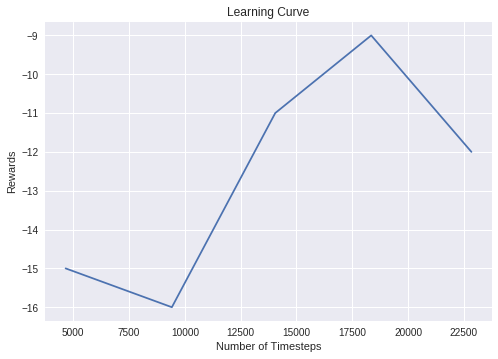

In [0]:
plot_results(log_dir)

# Running trained model


To exit game restart kernel

Runs on linux env with packages installed

In [0]:
model = DQN.load("deepq_IceHockey.pkl")  # Load saved model from file

obs = env_ram.reset() # Load trained model
while True: # Always play the game
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env_ram.step(action)
    env_ram.render()

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
